# Carrier Inc. Data Science & Innovation Take Home Challenge
## zeta disease prediction on the International Mars Colony

#### <font color='blue'>Import packages</font>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("2021-01-21_zeta-disease_training-data_dsi-take-home-challenge.csv")

In [3]:
data.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


In [4]:
data.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.201625,69.565000,85.887500,0.544496,43.121250,4.051250,0.348750
std,13.824025,31.942438,8.549155,19.874784,126.333656,0.348711,30.409949,4.176173,0.476873
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


<font color='blue'>describe shows there is no empty values in the dataset </font>

In [5]:
print("-----Maximum Values of each column-------")
print(data.max())
print("-----Minimum Values of each column-------")
print(data.min())

-----Maximum Values of each column-------
age                    109.0000
weight                 308.0000
bmi                     86.1000
blood_pressure         157.0000
insulin_test          1077.0000
liver_stress_test        3.4813
cardio_stress_test     214.0000
years_smoking           40.0000
zeta_disease             1.0000
dtype: float64
-----Minimum Values of each column-------
age                   18.0000
weight                94.0000
bmi                    0.0000
blood_pressure         0.0000
insulin_test           0.0000
liver_stress_test      0.1408
cardio_stress_test     0.0000
years_smoking          0.0000
zeta_disease           0.0000
dtype: float64


### Exploratory Data Analysis

<font color='blue'>Except age, liver_stress_test and weight, all column contains minimum value as zero. Let's take the count of zero values in each column</font>

In [6]:
for i in data.columns:
    if data[i].min() == 0:
        print('No of zero values and its percentages for column ',i,' are ',data[data[i] == 0][i].count(), ' and ',data[data[i] == 0][i].count()*100/data[i].count(), 'respectively.')
    

No of zero values and its percentages for column  bmi  are  11  and  1.375 respectively.
No of zero values and its percentages for column  blood_pressure  are  35  and  4.375 respectively.
No of zero values and its percentages for column  insulin_test  are  370  and  46.25 respectively.
No of zero values and its percentages for column  cardio_stress_test  are  227  and  28.375 respectively.
No of zero values and its percentages for column  years_smoking  are  114  and  14.25 respectively.
No of zero values and its percentages for column  zeta_disease  are  521  and  65.125 respectively.


<font color='blue'>Duplicate record check</font>

In [7]:
## Test if duplicate record present in the dataset
duplicate = data[data.duplicated()] 
duplicate

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
379,102,129,25.4,80,37,0.6458,55,1,0
393,99,205,33.3,76,150,1.4158,58,11,1
703,104,131,26.6,72,40,0.3458,48,1,0
761,18,283,24.6,52,94,0.6998,45,2,0
798,109,139,28.1,66,94,0.2298,53,1,0


In [8]:
# Remove duplicate records from the dataset
data = data.drop_duplicates()
data.count()

age                   795
weight                795
bmi                   795
blood_pressure        795
insulin_test          795
liver_stress_test     795
cardio_stress_test    795
years_smoking         795
zeta_disease          795
dtype: int64

<font color='blue'>Data type check</font>

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 0 to 799
Data columns (total 9 columns):
age                   795 non-null int64
weight                795 non-null int64
bmi                   795 non-null float64
blood_pressure        795 non-null int64
insulin_test          795 non-null int64
liver_stress_test     795 non-null float64
cardio_stress_test    795 non-null int64
years_smoking         795 non-null int64
zeta_disease          795 non-null int64
dtypes: float64(2), int64(7)
memory usage: 62.1 KB


As data types are int64 and float64, which actually agrees with the actual datatype, no datatype conversion required here.

Box plot for age


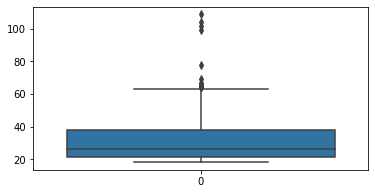

Box plot for weight


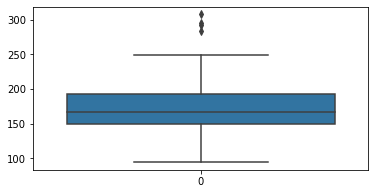

Box plot for bmi


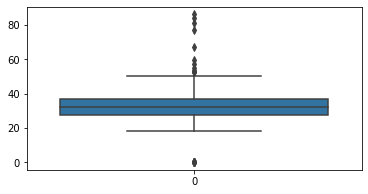

Box plot for blood_pressure


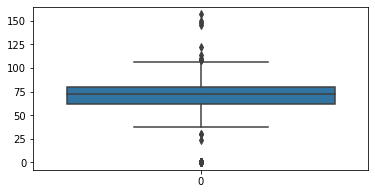

Box plot for insulin_test


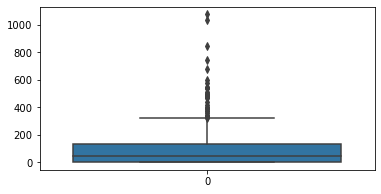

Box plot for liver_stress_test


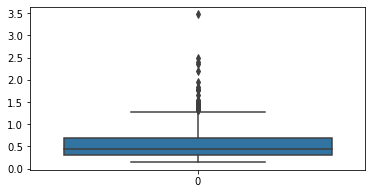

Box plot for cardio_stress_test


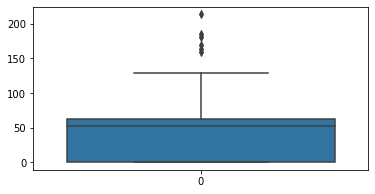

Box plot for years_smoking


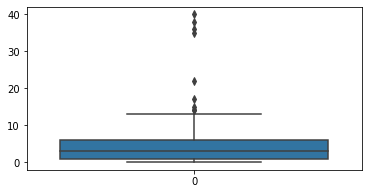

Box plot for zeta_disease


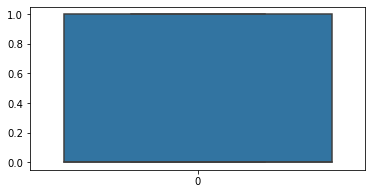

In [10]:
for i in data.columns:
    plt.figure(figsize=[6,3])
    sns.boxplot(data=data[i])
    print('Box plot for', i)
    plt.show()

In [11]:
# ## Skewness and Kurtosis of each column
# for i in data.columns:
#     print("------column",i,"-------")
#     print("Skewness: "+str(data[i].skew()))
#     print("Excess Kurtosis: "+str(data[i].kurtosis()))

Skewness for age is:  1.7095886550787245
Excess Kurtosis for age is:  4.733197564177434


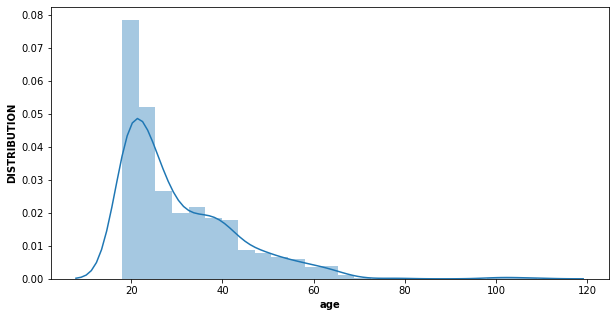

Skewness for weight is:  0.7127196118880993
Excess Kurtosis for weight is:  0.445428005502035


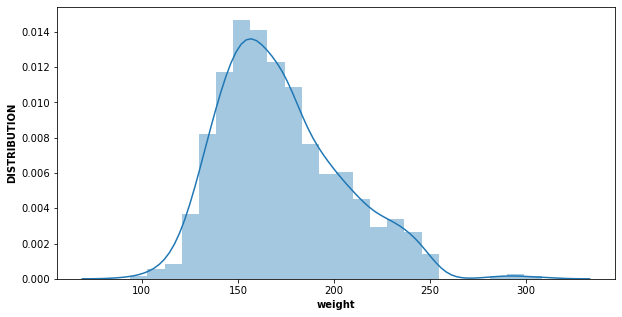

Skewness for bmi is:  0.5983193143341031
Excess Kurtosis for bmi is:  7.270199895374732


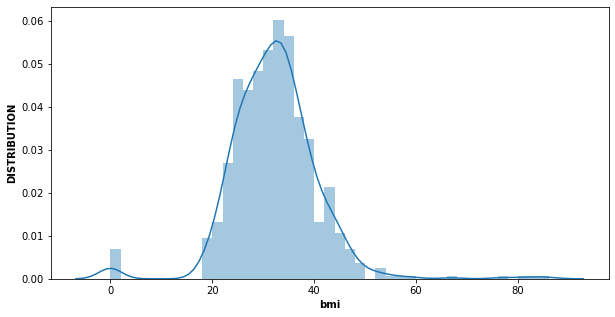

Skewness for blood_pressure is:  -1.3556292423800396
Excess Kurtosis for blood_pressure is:  5.582567403709424


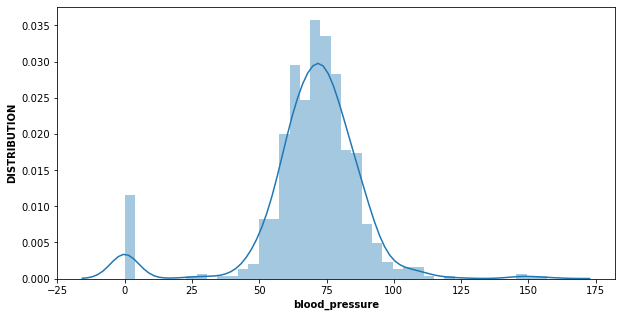

Skewness for insulin_test is:  2.8210022602155105
Excess Kurtosis for insulin_test is:  12.642191744643279


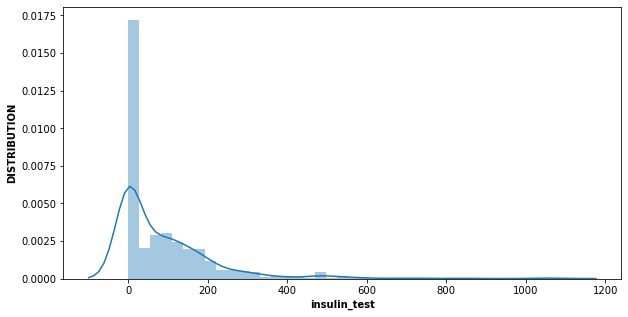

Skewness for liver_stress_test is:  2.345496970366898
Excess Kurtosis for liver_stress_test is:  10.215331906829974


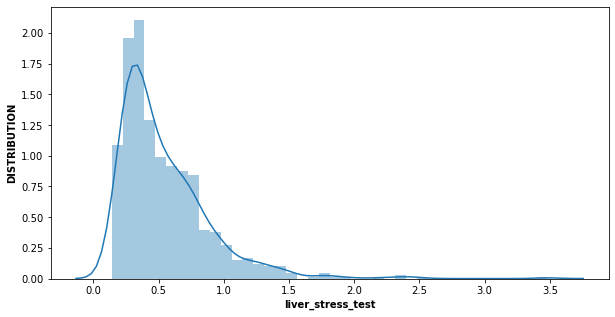

Skewness for cardio_stress_test is:  0.1528208598170297
Excess Kurtosis for cardio_stress_test is:  1.7774342481848433


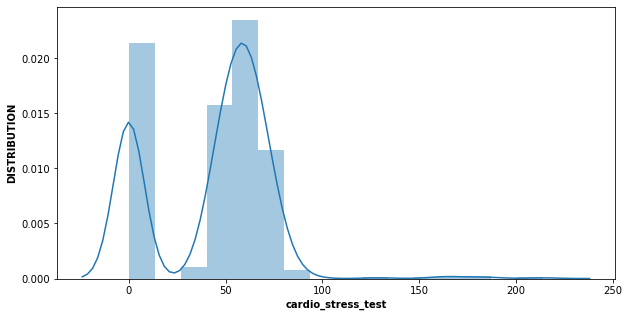

Skewness for years_smoking is:  3.0466480818975454
Excess Kurtosis for years_smoking is:  19.338427055526036


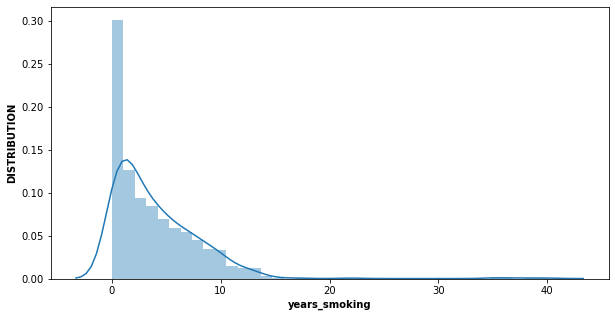

Skewness for zeta_disease is:  0.6316127083926122
Excess Kurtosis for zeta_disease is:  -1.6051097481907421


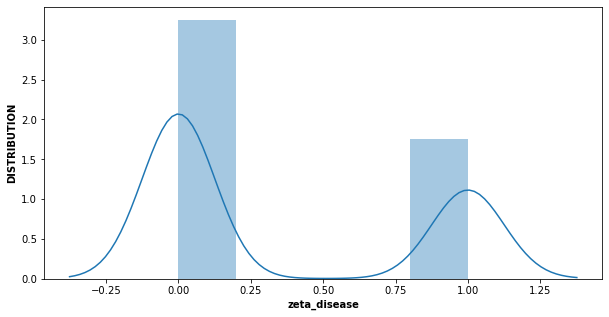

In [12]:
for i in data.columns:
    print("Skewness for",i,"is: ",str(data[i].skew()))
    print("Excess Kurtosis for",i,"is: ",str(data[i].kurtosis()))
    plt.figure(figsize=[10,5])
    sns.distplot(data[i])
    plt.xlabel(i,weight="bold")
    plt.ylabel("DISTRIBUTION",weight="bold")
    plt.show()

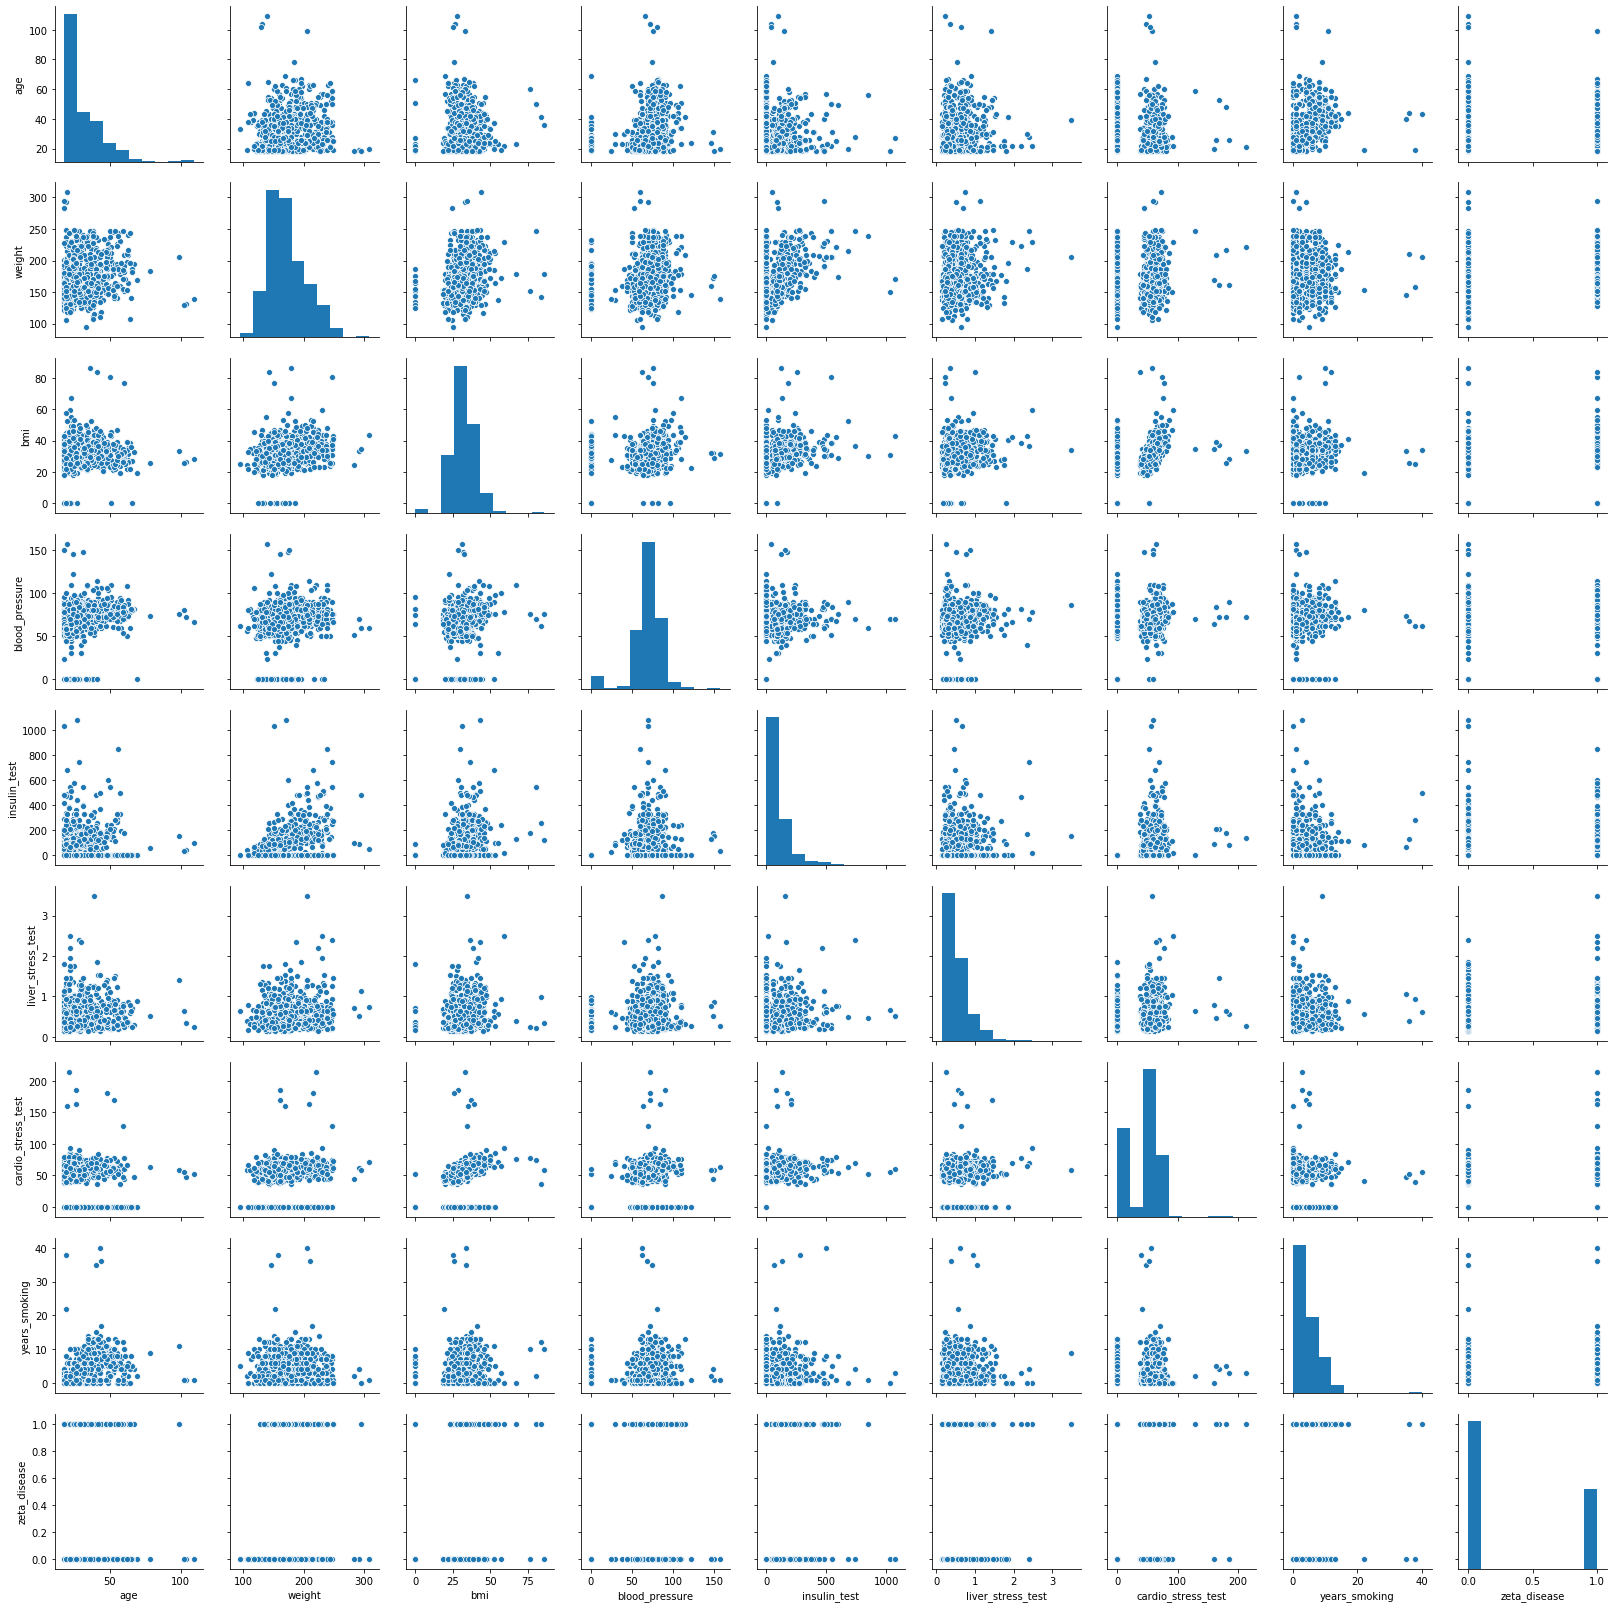

In [13]:
sns.pairplot(data)
plt.show()

In [14]:
# # Compute the correlation matrix
# corr = data.corr()

# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=np.bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# # cmap = sns.diverging_palette(220, 10, as_cmap=True)

# cmap = sns.diverging_palette(0,220, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5}) #, vmax=.3
# plt.show()

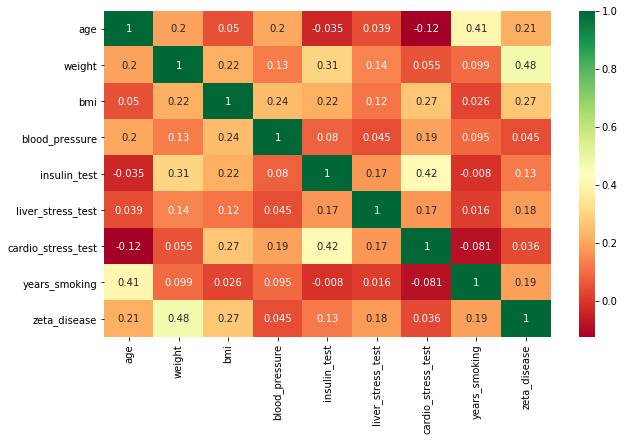

In [15]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,6))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [16]:
data_independent = data[['age','weight','bmi','blood_pressure','insulin_test','liver_stress_test','cardio_stress_test','years_smoking']]
data_dependent = data[['zeta_disease']]


# sns.jointplot(x='weight', y='bmi', data = data)



bmi is dependent on height and weight in MKS unit. We will generate wt in kg and ht in mtr as two derived columns

In [17]:
data["weight_kg"] =  data["weight"]*0.453
data["height_mtr"] = (data["weight_kg"]/data["bmi"]).transform('sqrt')

<font color='blue'>
The current dataset have weight FPS unit and BMI in MKS unit. So derived weight, height in MKS unit.
1) As bmi is dependent on ht, we can have ht and weight or bmi. 
2) We will find out the correlation of ht,wt and bmi with zeta_disease to see which attribute can be considered for model</font>

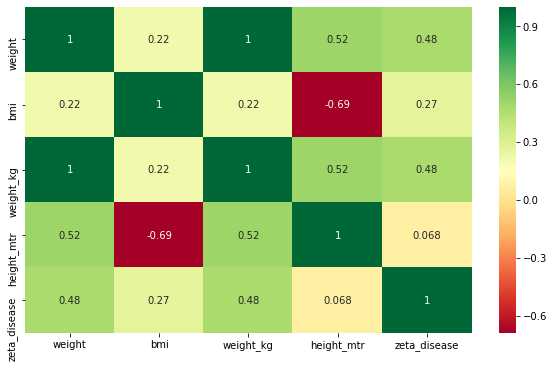

In [18]:
corrmat = data[["weight","bmi","weight_kg","height_mtr","zeta_disease"]].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,6))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<font color='blue'>The above figure shows that height has negligible relation with zeta_disease. So, dropping the attribute height and weight in pound for now. </font>

In [19]:
data = data.drop(columns = ["weight","height_mtr"])

In [20]:
## Data imputation for zero values. Here ia the analysis.
##1. Tthere are no empty columns in the dataset. But few of the attributes are having zero values. 

#### Data Normalization

In [21]:
data.head()
for i in data[['age', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test',
       'cardio_stress_test', 'years_smoking','weight_kg']]:
    print('processing for',i)
    data[i] = data[i]/(data[i].max()-data[i].min()) 

processing for age
processing for bmi
processing for blood_pressure
processing for insulin_test
processing for liver_stress_test
processing for cardio_stress_test
processing for years_smoking
processing for weight_kg


In [22]:
for i in data[['age', 'bmi', 'blood_pressure', 'insulin_test', 'liver_stress_test',
       'cardio_stress_test', 'years_smoking','weight_kg']]:
    print(i,'---',data[i].min())

age --- 0.1978021978021978
bmi --- 0.0
blood_pressure --- 0.0
insulin_test --- 0.0
liver_stress_test --- 0.04214937883550367
cardio_stress_test --- 0.0
years_smoking --- 0.0
weight_kg --- 0.4392523364485981


In [23]:
#We understand that 46.5 percent of insulin_test data is having zero value. Hence we can safely ignore this column from the dataframe
data = data.drop(columns = ['insulin_test'])

In [24]:
# Check the columns having values zero
for i in data.columns:
    if data[i].min() == 0:
        print('No of zero values and its percentages for column ',i,' are ',data[data[i] == 0][i].count(), ' and ',data[data[i] == 0][i].count()*100/data[i].count(), 'respectively.')
    

No of zero values and its percentages for column  bmi  are  11  and  1.3836477987421383 respectively.
No of zero values and its percentages for column  blood_pressure  are  35  and  4.40251572327044 respectively.
No of zero values and its percentages for column  cardio_stress_test  are  227  and  28.553459119496857 respectively.
No of zero values and its percentages for column  years_smoking  are  114  and  14.339622641509434 respectively.
No of zero values and its percentages for column  zeta_disease  are  517  and  65.03144654088051 respectively.


The zero values of years_smoking and zeta_disease are logical and correct. The zero value on column zeta_disease is a class value and on years_smoking column seems to be correct. Hence we will take action on four columns i.e. bmi, blood_pressure and cardio_stress_test

In [25]:
for i in data.columns:
    if data[i].min() == 0:
        print(i,data[i].min(), data[i].max())

bmi 0.0 1.0
blood_pressure 0.0 1.0
cardio_stress_test 0.0 1.0
years_smoking 0.0 1.0
zeta_disease 0 1


In [26]:
# We want to impute bmi, blood_pressure and cardio_stress_test. Hence zero values will be converted to nan. Then the nan values will be imputed.
for i in data[['bmi','blood_pressure','cardio_stress_test']]:
    data[i].replace(0, np.nan, inplace=True)

In [27]:
## MICE Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
data.columns

Index(['age', 'bmi', 'blood_pressure', 'liver_stress_test',
       'cardio_stress_test', 'years_smoking', 'zeta_disease', 'weight_kg'],
      dtype='object')

In [28]:
imputer = IterativeImputer(imputation_order='descending',max_iter=10,random_state=42,n_nearest_features=None)
# imputed_dataset = imputer.fit_transform(data)
imputer.fit(data)
imputed_dataset = imputer.transform(data)

In [29]:
imputed_dataset = pd.DataFrame(imputed_dataset, columns = ['age', 'bmi', 'blood_pressure', 'liver_stress_test',
       'cardio_stress_test', 'years_smoking', 'zeta_disease', 'weight_kg'])
for i in imputed_dataset.columns:
#     print(i, data[i].min())
    print(i, imputed_dataset[i].min(), imputed_dataset[i].max())

age 0.1978021978021978 1.1978021978021978
bmi 0.21138211382113822 1.0
blood_pressure 0.15286624203821655 1.0
liver_stress_test 0.04214937883550367 1.0421493788355036
cardio_stress_test 0.17289719626168223 1.0
years_smoking 0.0 1.0
zeta_disease 0.0 1.0
weight_kg 0.4392523364485981 1.439252336448598


### Model Building

In [30]:
# Prepare Dependent and independent dataset for model
x=imputed_dataset[['age', 'weight_kg','bmi', 'blood_pressure', 'liver_stress_test','cardio_stress_test', 'years_smoking']]
y=imputed_dataset[['zeta_disease']]

# Split the dependent and independent dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

#### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [32]:
rf_clf = RandomForestClassifier(max_depth=5, random_state=0)
rf_clf.fit(X_train, y_train)

C:\Users\kishor\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [33]:
y_predict = rf_clf.predict(X_test)

In [34]:
print("R-squared value:",sqrt(mean_squared_error(y_test,y_predict)))
print(r2_score(y_test,y_predict))

R-squared value: 0.4619406036915484
0.07826678765880235


In [35]:
# Prepare a Dataframe with column name and it's corresponding Gini Index 
Feature_Importance = {"Feature_Name": X_train.columns, "Feature_Importance_Gini": rf_clf.feature_importances_}
Feature_Importance = pd.DataFrame (Feature_Importance, columns = ['Feature_Name','Feature_Importance_Gini'])

# Sort the value with importance of feature
Feature_Importance_sorted = Feature_Importance.sort_values(by=['Feature_Importance_Gini'], ascending=False)
Feature_Importance_sorted

,Feature_Name,Feature_Importance_Gini
1,weight_kg,0.385542
5,cardio_stress_test,0.163819
2,bmi,0.142825
0,age,0.115451
4,liver_stress_test,0.082546
6,years_smoking,0.070820
3,blood_pressure,0.038996


Text(0.5, 0, 'Feature_Importance_Gini')

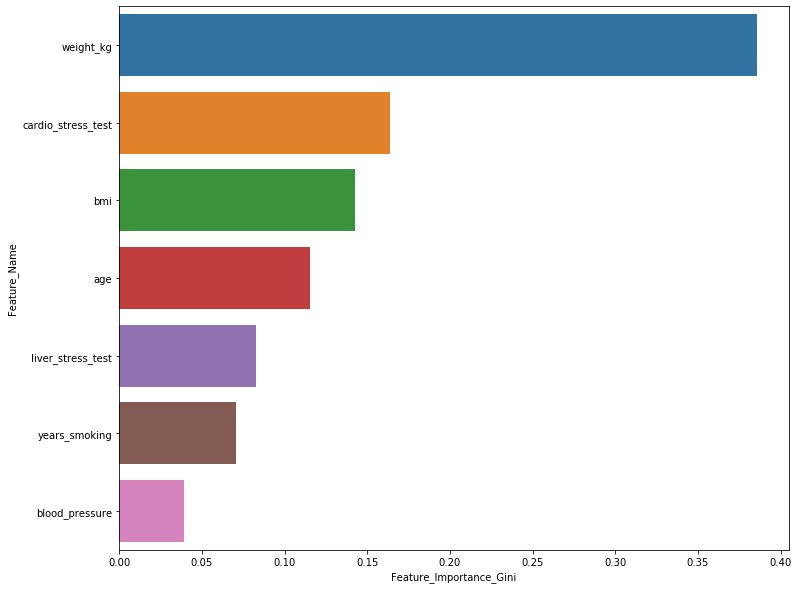

In [36]:
plt.figure(figsize = (12,10))
Plot_var = sns.barplot(x='Feature_Importance_Gini', y='Feature_Name', data=Feature_Importance_sorted)
Plot_var.set_xlabel('Feature_Importance_Gini')

#### Predict using prection dataset

In [37]:
predict_dataset = pd.read_csv('2021-01-21_zeta-disease_prediction-data_dsi-take-home-challenge.csv')
print(predict_dataset.count())
predict_dataset.head()

age                   20
weight                20
bmi                   20
blood_pressure        20
insulin_test          20
liver_stress_test     20
cardio_stress_test    20
years_smoking         20
zeta_disease           0
dtype: int64


,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,NaN
1,27,179,35.5,89,156,1.6608,43,6,NaN
2,34,147,26.9,76,74,1.6958,53,2,NaN
3,35,206,32.4,73,127,1.4608,61,6,NaN
4,60,193,29.8,62,192,1.7798,65,9,NaN


#### Feature Engineering

In [38]:
predict_dataset["weight_kg"] =  predict_dataset["weight"]*0.453
predict_dataset = predict_dataset.drop_duplicates()
predict_dataset.drop(columns = ["insulin_test","weight"], inplace = True)

In [39]:
predict_dataset_arranged = predict_dataset[['age', 'weight_kg', 'bmi', 'blood_pressure', 'liver_stress_test',
       'cardio_stress_test', 'years_smoking','zeta_disease']]

In [40]:
X_train.columns

Index(['age', 'weight_kg', 'bmi', 'blood_pressure', 'liver_stress_test',
       'cardio_stress_test', 'years_smoking'],
      dtype='object')

In [41]:
for i in predict_dataset_arranged[['age', 'bmi', 'blood_pressure', 'liver_stress_test','cardio_stress_test', 'years_smoking','weight_kg']]:
    print('processing for',i)
    predict_dataset_arranged[i] = predict_dataset_arranged[i]/(predict_dataset_arranged[i].max()-predict_dataset_arranged[i].min()) 

processing for age
processing for bmi
processing for blood_pressure
processing for liver_stress_test
processing for cardio_stress_test
processing for years_smoking
processing for weight_kg


In [42]:
# predict_dataset
x_predict_dataset=predict_dataset_arranged[['age', 'weight_kg','bmi', 'blood_pressure', 'liver_stress_test','cardio_stress_test', 'years_smoking']]
# y_predict_dataset=predict_dataset[['zeta_disease']]
y_predicted_dataset = rf_clf.predict(x_predict_dataset)

In [43]:
y_predicted_dataset

array([1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0.])

In [44]:
rd_final_predict = pd.concat([pd.DataFrame(predict_dataset), pd.DataFrame(y_predicted_dataset)], axis=1)
# result = pd.concat([df1, s1], axis=1)

In [45]:
rd_final_predict.drop(columns = 'zeta_disease', inplace = True)

In [46]:
rd_final_predict

,age,bmi,blood_pressure,liver_stress_test,cardio_stress_test,years_smoking,weight_kg,0
0,24,39.5,69,1.3968,56,4,68.403,1.0
1,27,35.5,89,1.6608,43,6,81.087,1.0
2,34,26.9,76,1.6958,53,2,66.591,0.0
3,35,32.4,73,1.4608,61,6,93.318,1.0
4,60,29.8,62,1.7798,65,9,87.429,1.0
5,45,36.5,108,1.2978,54,12,54.360,1.0
6,20,38.2,61,1.5818,68,3,62.967,1.0
7,23,31.2,70,1.4168,59,7,62.061,1.0
8,36,30.5,59,1.4498,59,6,88.335,1.0
9,19,25.8,84,1.7938,50,3,87.429,1.0


## Future scope of work
- Code modularization
- Trying Bosting and ANN over the dataset
- Better feature extraction
- Statistical tests for normal distributions such as "Anderson Darling etc.."
- Grid Search for hyper-parameter tuning